<a href="https://colab.research.google.com/github/MessaoudAbbas/Codes_Military_Objects/blob/main/TP4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Work

In [ ]:
from google.colab import drive
drive.mount('/content/mdrive/')

Mounted at /content/mdrive/


In [ ]:
import pandas as pd
data = pd.read_csv('/content/mdrive/MyDrive/ColabNotebooks/Datasets/Iris_Prices.csv')
data.head(100)

,sepal_length,sepal_width,petal_length,petal_width,Iris_class,Price
0,5.1,3.5,NaN,0.2,Iris-setosa,21.0
1,4.9,3.0,NaN,0.2,Iris-setosa,25.0
2,4.7,3.2,NaN,0.2,Iris-setosa,20.0
3,4.6,3.1,1.5,0.2,Iris-setosa,20.0
4,5.0,3.6,1.4,0.2,Iris-setosa,20.0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,120.0
96,5.7,2.9,4.2,1.3,Iris-versicolor,130.0
97,6.2,2.9,4.3,1.3,Iris-versicolor,130.0
98,5.1,2.5,3.0,1.1,Iris-versicolor,110.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  144 non-null    float64
 3   petal_width   150 non-null    float64
 4   Iris_class    150 non-null    object 
 5   Price         150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [ ]:
data["Iris_class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Iris_class, dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,Price
count,150.000000,150.000000,144.000000,150.000000,150.000000
mean,5.843333,3.054000,3.832639,1.198667,119.906667
std,0.828066,0.433594,1.744555,0.763161,76.264494
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,30.000000
50%,5.800000,3.000000,4.400000,1.300000,130.000000
75%,6.400000,3.300000,5.100000,1.800000,180.000000
max,7.900000,4.400000,6.900000,2.500000,250.000000


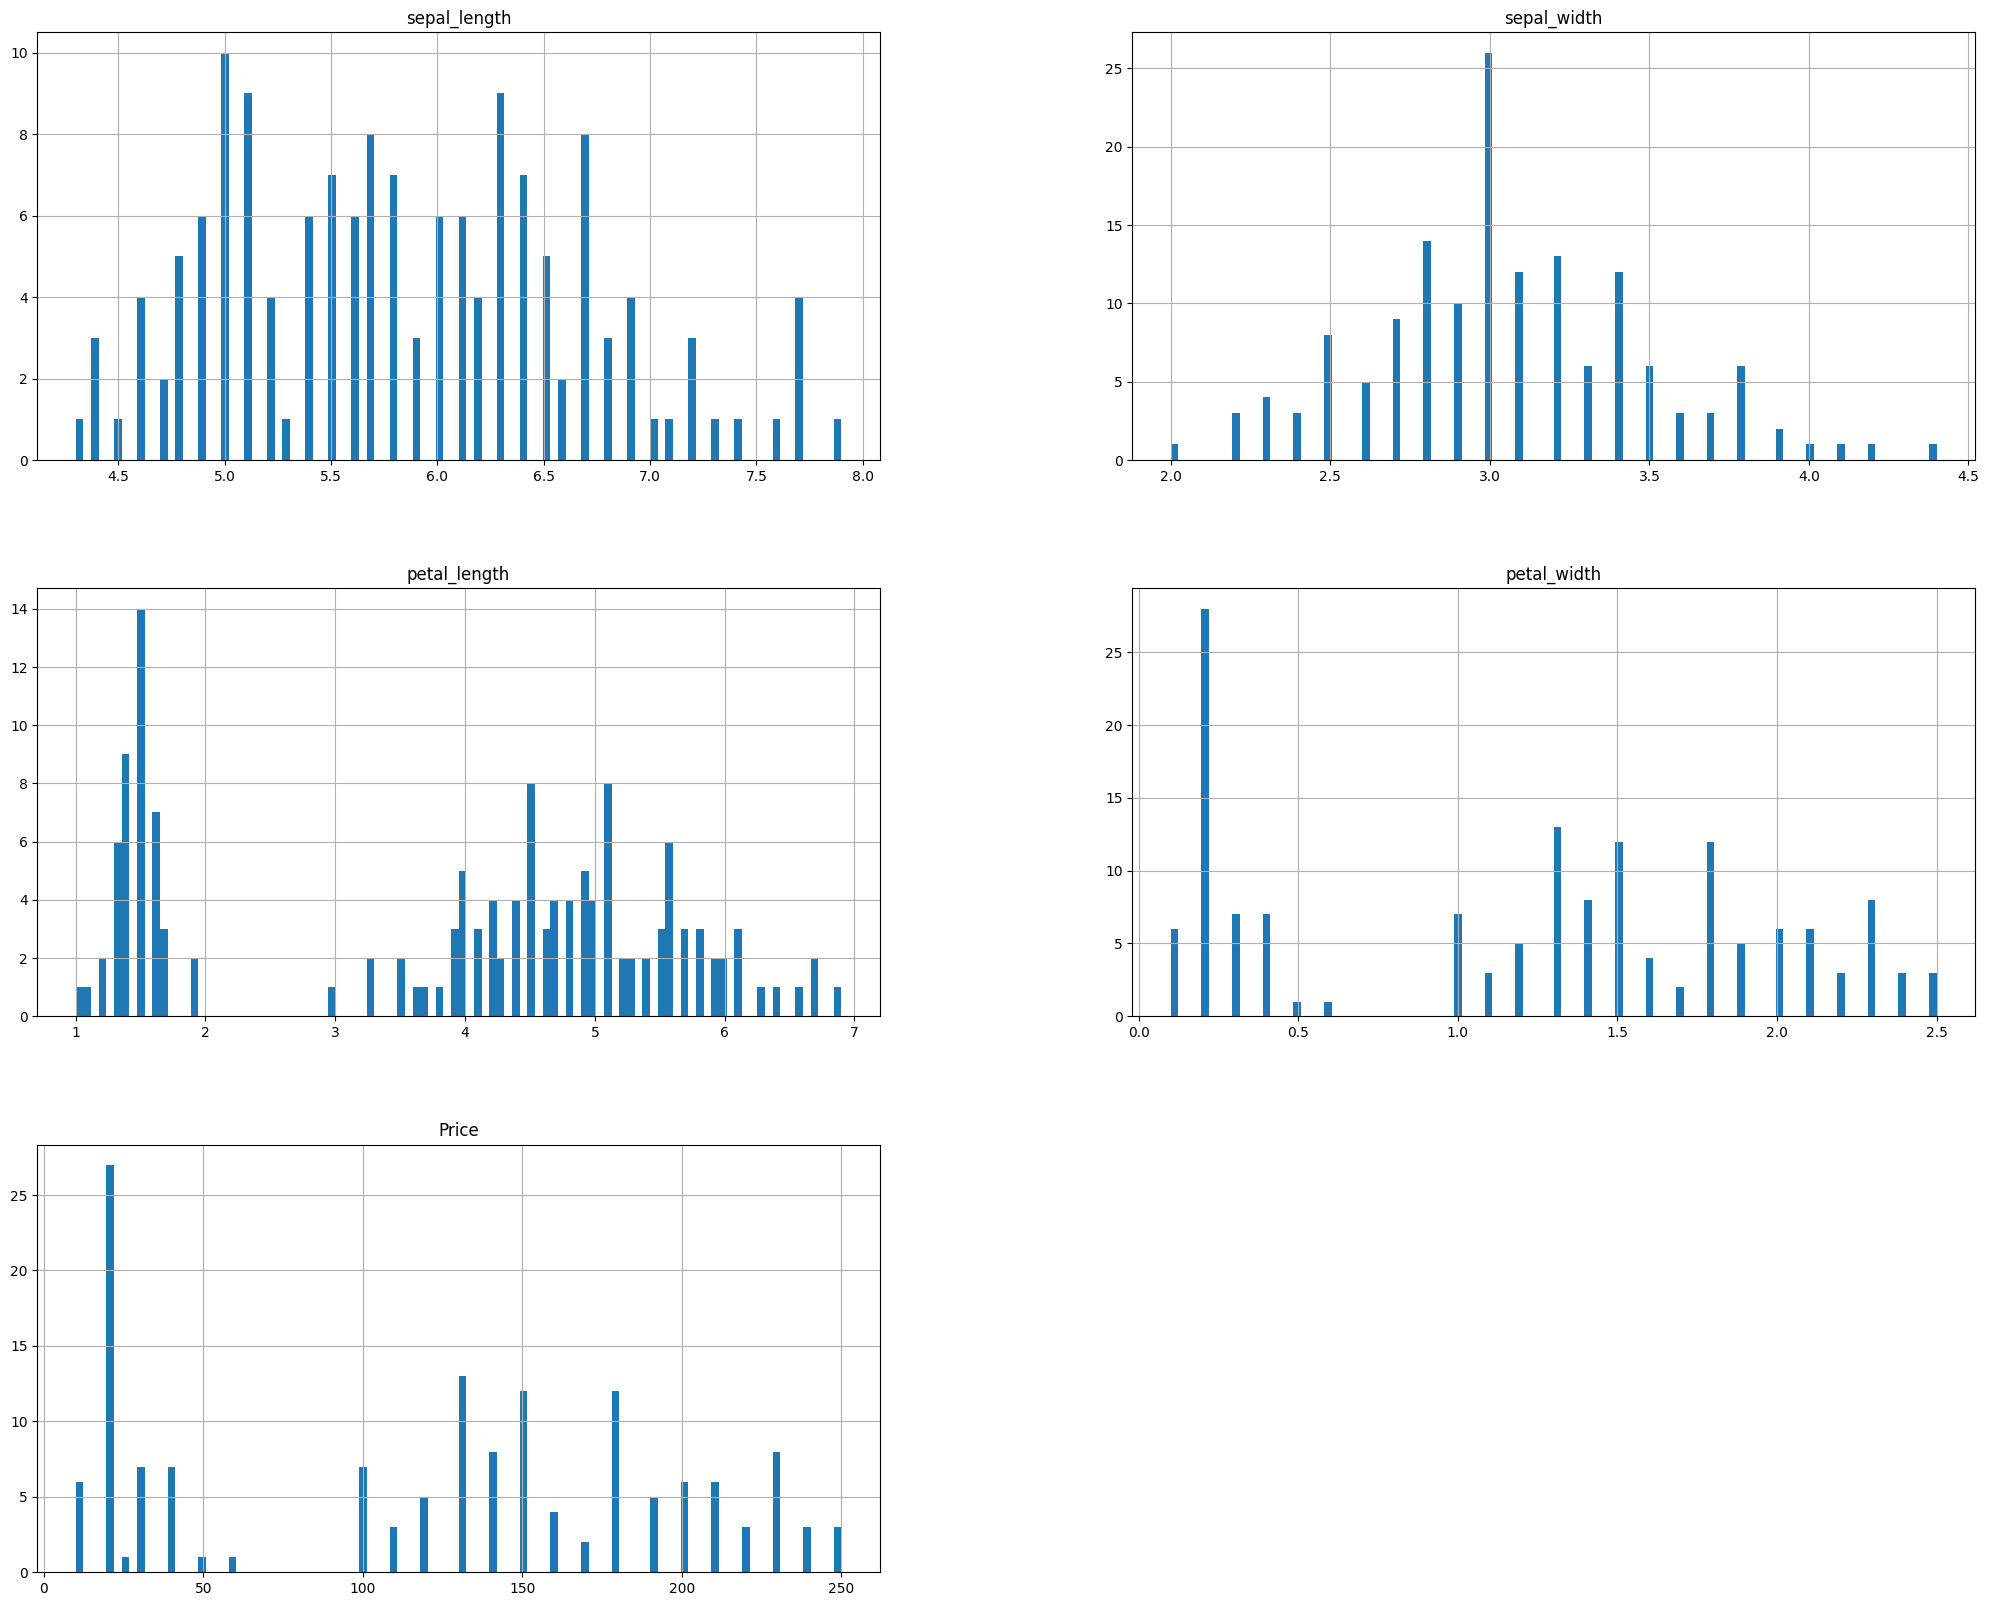

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=100, figsize=(25,20))
plt.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix["petal_width"].sort_values(ascending=False)


<ipython-input-8-3157cfc4b53a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


petal_width     1.000000
Price           0.999985
petal_length    0.960545
sepal_length    0.817954
sepal_width    -0.356544
Name: petal_width, dtype: float64

In [ ]:
import numpy as np
data["petal_widtn_cat"] = pd.cut(data["petal_width"],
                              bins=[0.0, 0.5, 1.0, 1.5, 2.0, np.inf],
                              labels=[1, 2, 3, 4, 5])


In [ ]:
data.head(100)

,sepal_length,sepal_width,petal_length,petal_width,Iris_class,Price,petal_widtn_cat
0,5.1,3.5,NaN,0.2,Iris-setosa,21.0,1
1,4.9,3.0,NaN,0.2,Iris-setosa,25.0,1
2,4.7,3.2,NaN,0.2,Iris-setosa,20.0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,20.0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,20.0,1
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,120.0,3
96,5.7,2.9,4.2,1.3,Iris-versicolor,130.0,3
97,6.2,2.9,4.3,1.3,Iris-versicolor,130.0,3
98,5.1,2.5,3.0,1.1,Iris-versicolor,110.0,3


In [ ]:
data["petal_widtn_cat"].value_counts()

1    49
3    41
4    29
5    23
2     8
Name: petal_widtn_cat, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["petal_widtn_cat"]):
  train_set = data.loc[train_index]
  test_set  = data.loc[test_index]
  #print("%s %s" % (train_index, test_index))

test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 109 to 48
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sepal_length     30 non-null     float64 
 1   sepal_width      30 non-null     float64 
 2   petal_length     29 non-null     float64 
 3   petal_width      30 non-null     float64 
 4   Iris_class       30 non-null     object  
 5   Price            30 non-null     float64 
 6   petal_widtn_cat  30 non-null     category
dtypes: category(1), float64(5), object(1)
memory usage: 1.9+ KB


In [ ]:
test_set["petal_widtn_cat"].value_counts()/len(test_set)

1    0.333333
3    0.266667
4    0.200000
5    0.166667
2    0.033333
Name: petal_widtn_cat, dtype: float64

In [ ]:

train_set["petal_widtn_cat"].value_counts()/len(train_set)

1    0.325000
3    0.275000
4    0.191667
5    0.150000
2    0.058333
Name: petal_widtn_cat, dtype: float64

In [ ]:
for set_ in (train_set, test_set):
    set_.drop("petal_widtn_cat", axis=1, inplace=True)


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 111 to 30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  115 non-null    float64
 3   petal_width   120 non-null    float64
 4   Iris_class    120 non-null    object 
 5   Price         120 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.6+ KB


## **Copy the data**

In [ ]:
data = train_set.drop("Price", axis=1)
data_labels = train_set["Price"].copy()

train_copy = train_set.copy()



<Axes: xlabel='petal_length', ylabel='petal_width'>

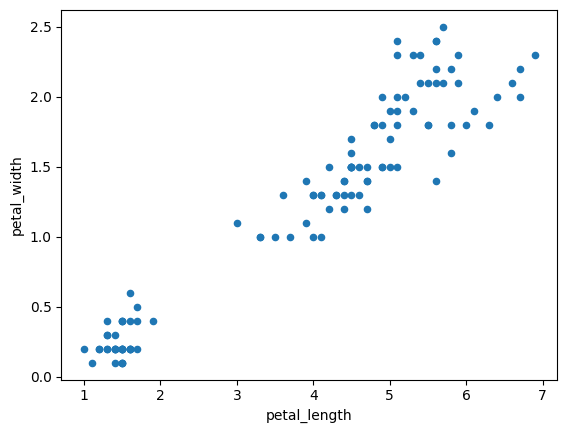

In [ ]:

train_set.plot(kind="scatter", x="petal_length", y="petal_width")


<Axes: xlabel='petal_length', ylabel='petal_width'>

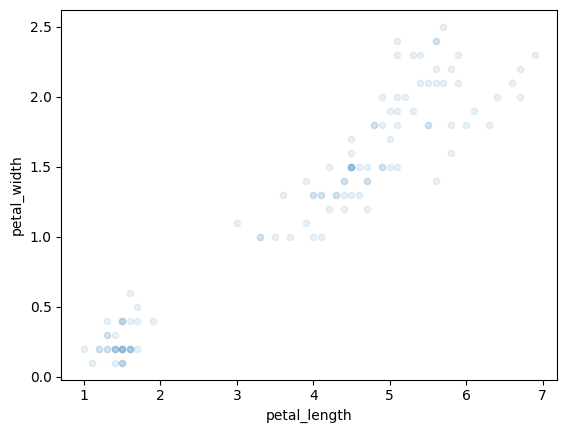

In [ ]:
train_set.plot(kind="scatter", x="petal_length", y="petal_width", alpha=0.1)

<Axes: xlabel='petal_length', ylabel='petal_width'>

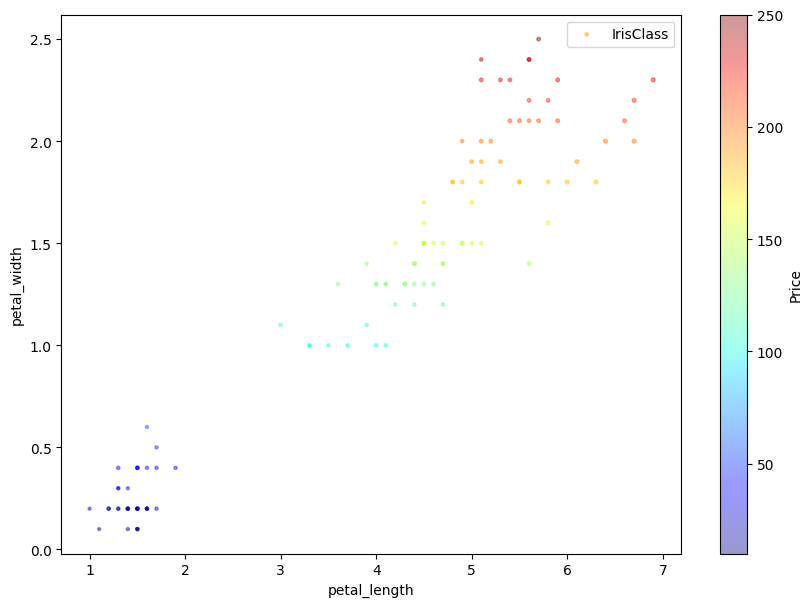

In [ ]:
train_set.plot(kind="scatter", x="petal_length", y="petal_width", alpha=0.4,
            s=train_set["sepal_length"], label="IrisClass",
            figsize=(10,7), c="Price" ,
            cmap=plt.get_cmap("jet"), colorbar=True,)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>,
        <Axes: xlabel='Price', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>,
        <Axes: xlabel='Price', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>,
        <Axes: xlabel='Price', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', y

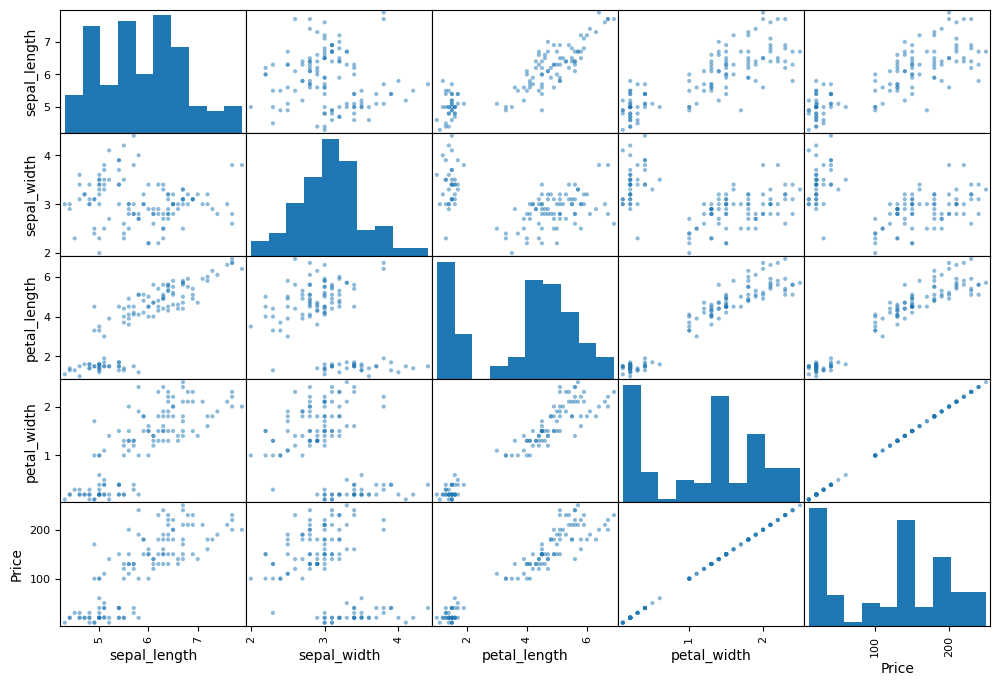

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 8))

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 111 to 30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  115 non-null    float64
 3   petal_width   120 non-null    float64
 4   Iris_class    120 non-null    object 
 5   Price         120 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.6+ KB


### **Fixing the problem of attributes with missing data**

In [ ]:
median = train_set["petal_length"].median()
train_set["petal_length"].fillna(median, inplace=True)


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 111 to 30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   Iris_class    120 non-null    object 
 5   Price         120 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.6+ KB


In [ ]:
train_set.head(30)

,sepal_length,sepal_width,petal_length,petal_width,Iris_class,Price
111,6.4,2.7,5.3,1.9,Iris-virginica,190.0
14,5.8,4.0,1.2,0.2,Iris-setosa,20.0
74,6.4,2.9,4.3,1.3,Iris-versicolor,130.0
35,5.0,3.2,1.2,0.2,Iris-setosa,20.0
119,6.0,2.2,5.0,1.5,Iris-virginica,150.0
60,5.0,2.0,3.5,1.0,Iris-versicolor,100.0
93,5.0,2.3,3.3,1.0,Iris-versicolor,100.0
146,6.3,2.5,5.0,1.9,Iris-virginica,190.0
40,5.0,3.5,1.3,0.3,Iris-setosa,30.0
29,4.7,3.2,1.6,0.2,Iris-setosa,20.0


## **Convert text attributes to numbers.**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data_cat = train_set[["Iris_class"]]
#data_cat.head(10)
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:30]

array([[2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.]])

In [ ]:
df = pd.DataFrame(data_cat_encoded, columns = ['Iris_class'])

train_set["Iris_class"] = df["Iris_class"].copy()
#train_set.head(20)

median1 = train_set["Iris_class"].median()
train_set["Iris_class"].fillna(median1, inplace=True)
train_set.head(20)


,sepal_length,sepal_width,petal_length,petal_width,Iris_class,Price
111,6.4,2.7,5.3,1.9,2.0,190.0
14,5.8,4.0,1.2,0.2,0.0,20.0
74,6.4,2.9,4.3,1.3,0.0,130.0
35,5.0,3.2,1.2,0.2,1.0,20.0
119,6.0,2.2,5.0,1.5,0.0,150.0
60,5.0,2.0,3.5,1.0,2.0,100.0
93,5.0,2.3,3.3,1.0,1.0,100.0
146,6.3,2.5,5.0,1.9,1.0,190.0
40,5.0,3.5,1.3,0.3,1.0,30.0
29,4.7,3.2,1.6,0.2,0.0,20.0


### Features **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler as stc
scaler = stc()
p_set = scaler.fit_transform(train_set)
prepared_set = pd.DataFrame(p_set, columns = train_set.columns)
prepared_set.describe()




,sepal_length,sepal_width,petal_length,petal_width,Iris_class,Price
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-3.663736e-16,7.401487e-16,-1.184238e-16,-5.921189e-17,1.036208e-16,-6.291264e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.868973e+00,-2.387976e+00,-1.664748e+00,-1.464318e+00,-1.326261e+00,-1.464645e+00
25%,-9.140958e-01,-5.814695e-01,-1.316110e+00,-1.197472e+00,-1.326261e+00,-1.197759e+00
50%,-7.857842e-02,-1.298427e-01,3.108692e-01,1.367586e-01,2.247901e-02,1.366676e-01
75%,6.674192e-01,5.475974e-01,7.176140e-01,8.038739e-01,1.371219e+00,8.038811e-01
max,2.427974e+00,3.031545e+00,1.763529e+00,1.737835e+00,1.371219e+00,1.737980e+00


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

data_num = data.drop("Iris_class", axis=1)
data_num_tr = num_pipeline.fit_transform(data_num)

#df = pd.DataFrame(data_num_tr, columns = data_num.columns)
#df.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)
cat_attribs = ["Iris_class"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
                                  ])
data_prepared = full_pipeline.fit_transform(data)
#data.head()
#df = pd.DataFrame(data_prepared, columns = data_prepared.dtype.names)
#df.head(55)

### **Testing Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


lin_reg.fit(data_prepared, data_labels)


LinearRegression()

# **Try The model out on a few from the training set**


In [ ]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
some_labels.head()

Predictions: [189.99034219  19.97093546 129.98879883  19.98731298 149.9974611 ]


111    190.0
14      20.0
74     130.0
35      20.0
119    150.0
Name: Price, dtype: float64

# **Measure the RMSE on the whole training set**




In [ ]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.08145352843220433

## **Trying with DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, data_labels)
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## **Evaluation with cross_Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:\n", scores)
    print("Mean:\n", scores.mean())
    print("Standard deviation:\n", scores.std())

display_scores(scores)

Scores:
 [ -0.          -0.08333333 -41.66666667  -0.          -0.08333333
  -0.          -8.33333333 -16.66666667  -0.         -16.66666667]
Mean:
 -8.35
Standard deviation:
 12.899224782908465


## **Let's compute for Linear Regression**

In [ ]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(scores)

Scores:
 [-0.04166667 -0.00024921 -0.01814079 -0.00244879 -0.00061335]
Mean:
 -0.01262375955484638
Standard deviation:
 0.015967702621510017



## **Trying RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, data_labels)

data_predictions = forest_reg.predict(data_prepared)

forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.0201151895741973

In [ ]:
scores = cross_val_score(forest_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(scores)

Scores:
 [ -1.18234167  -1.45166667 -45.76833333  -5.2342      -0.83680833
  -6.8875     -20.29916667  -1.81416667  -2.00335    -17.19833333]
Mean:
 -10.267586666666666
Standard deviation:
 13.545074555952374
